In [10]:
%matplotlib inline

In [276]:
from __future__ import print_function
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [288]:
SAMPLE_RATE = 44100
HOP_LENGTH = 1024
NORM = np.inf
THRESHOLD = 0
BINS_PER_OCTAVE = 36
CQT_MODE = 'full'

myFile = '/Users/angelosx/Insync/datasets-key/gs/gs-wav/975138.LOFI.wav'
y, sr = librosa.load(myFile, sr=SAMPLE_RATE)

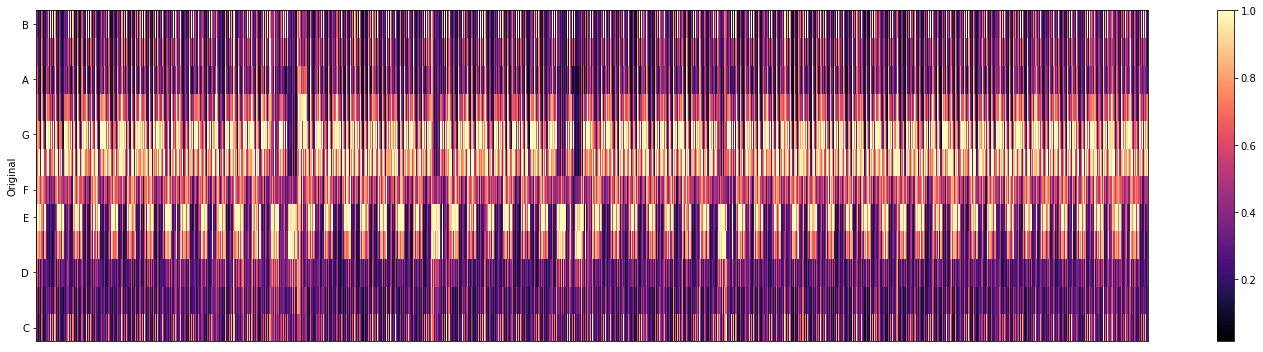

In [289]:
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=SAMPLE_RATE, hop_length=HOP_LENGTH, 
                                         norm=NORM, threshold=THRESHOLD, cqt_mode=CQT_MODE)

plt.figure(figsize=(20,5))
librosa.display.specshow(chroma_orig, y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')
plt.tight_layout()

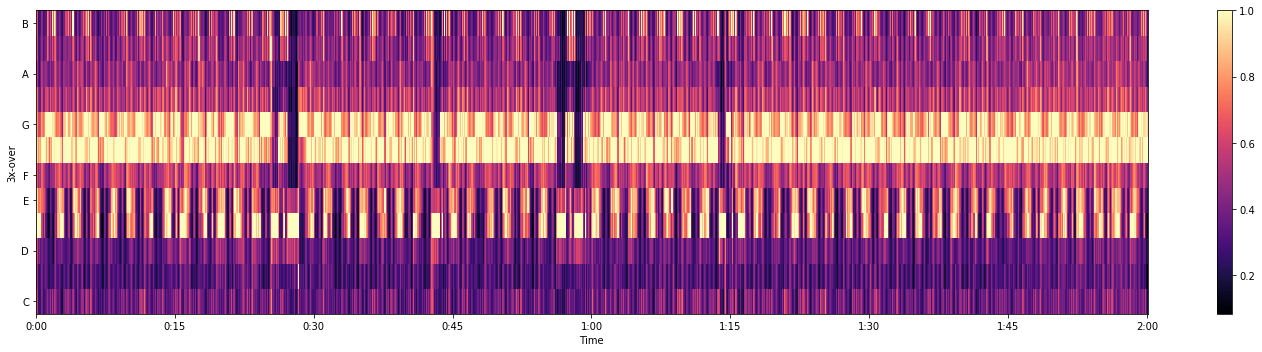

In [290]:
# three bins per semitone!
chroma_os = librosa.feature.chroma_cqt(y=y, sr=SAMPLE_RATE, hop_length=HOP_LENGTH, norm=NORM, 
                                       threshold=THRESHOLD, bins_per_octave=BINS_PER_OCTAVE, cqt_mode=CQT_MODE)

plt.figure(figsize=(20, 5))
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('3x-over')
plt.tight_layout()

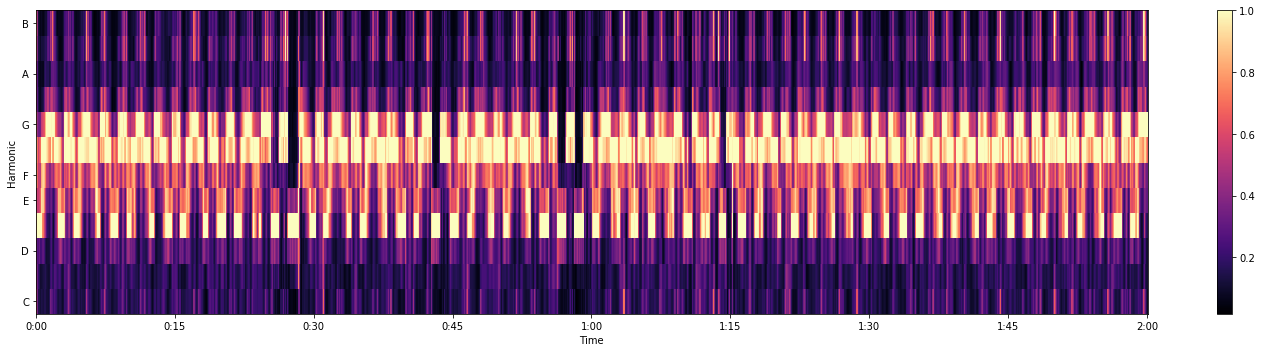

In [291]:
# percussive-harmonic separation
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=SAMPLE_RATE, hop_length=HOP_LENGTH, norm=NORM, 
                                       threshold=THRESHOLD, bins_per_octave=BINS_PER_OCTAVE, cqt_mode=CQT_MODE)

plt.figure(figsize=(20, 5))
librosa.display.specshow(chroma_os_harm, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Harmonic')
plt.tight_layout()

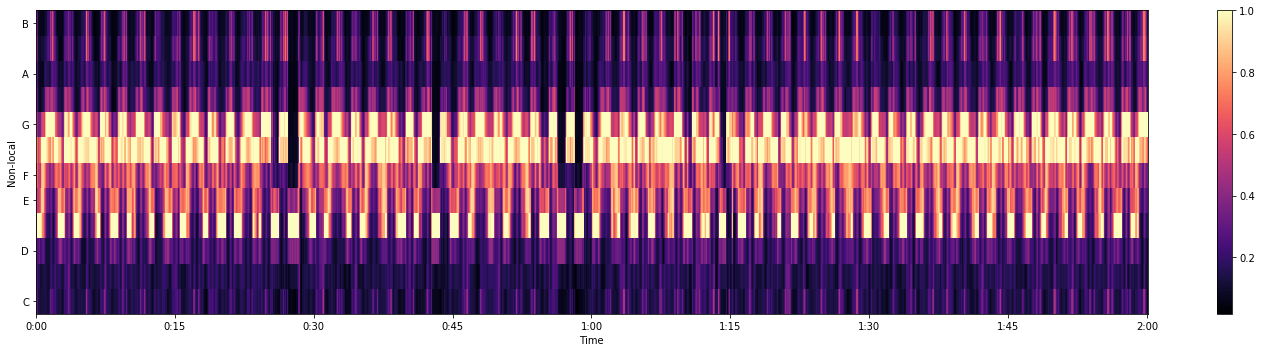

In [292]:
# non-local filtering to remove any sparse additive noise from the features.
chroma_filter = np.minimum(chroma_os_harm, 
                           librosa.decompose.nn_filter(chroma_os_harm, aggregate=np.median, metric='cosine'))

plt.figure(figsize=(20, 5))
librosa.display.specshow(chroma_filter, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Non-local')
plt.tight_layout()

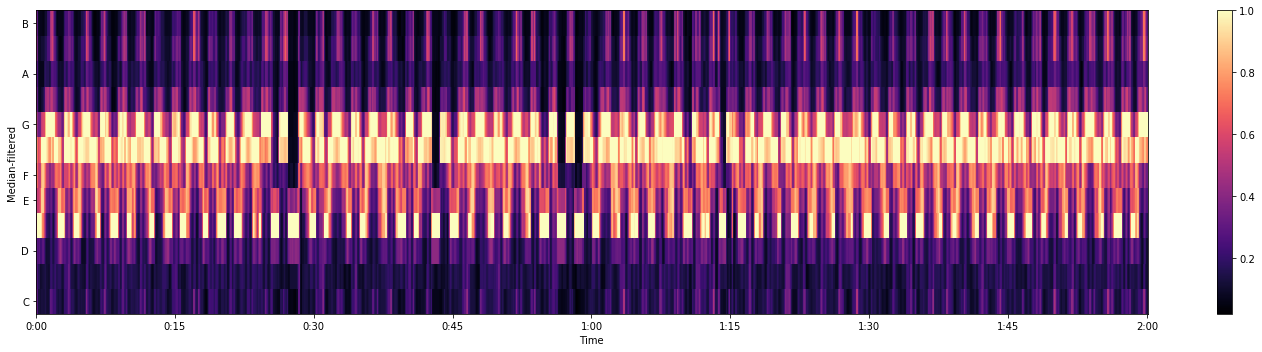

In [296]:
# Local discontinuities and transients can be suppressed by using a horizontal median filter:
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))

# chroma_filter.shape[1])
                                            

plt.figure(figsize=(20, 5))
librosa.display.specshow(chroma_smooth, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Median-filtered')
plt.tight_layout()

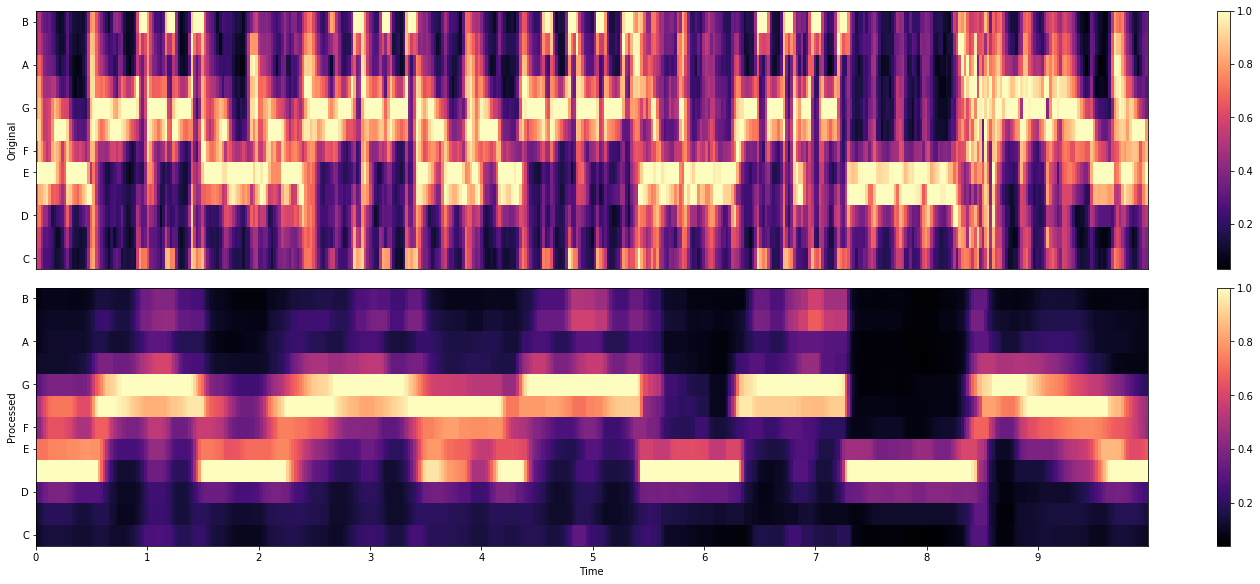

In [297]:
# comparison between the original chromagram and the result of the filtering (20 secs).

idx = [slice(None), slice(*list(librosa.time_to_frames([20, 30])))]

plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_smooth[idx], y_axis='chroma', x_axis='time')
plt.ylabel('Processed')
plt.colorbar()
plt.tight_layout()


frame_n 558


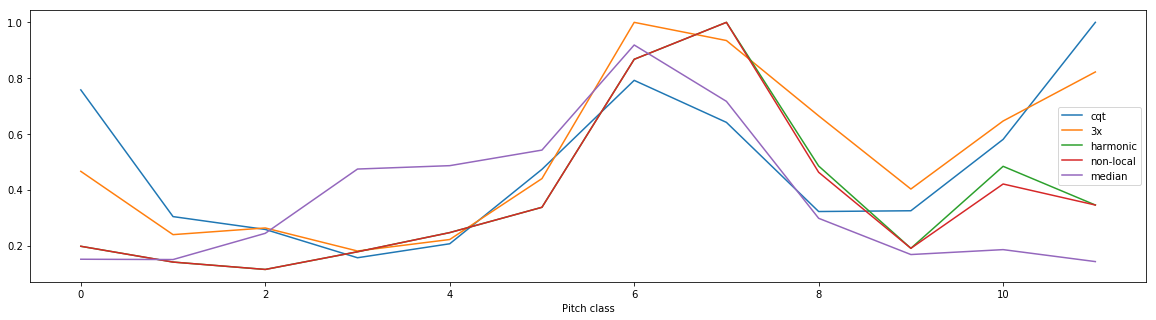

In [294]:
chroma1 = chroma_orig.transpose()
chroma2 = chroma_os.transpose()
chroma3 = chroma_os_harm.transpose()
chroma4 = chroma_filter.transpose()
chroma5 = chroma_smooth.transpose()

window_n = np.random.randint(chroma2.shape[0])
print('frame_n {}'.format(window_n))

plt.figure(figsize=(20,5))
ax = plt.gca()
ax.plot(chroma1[window_n], label='cqt')
ax.plot(chroma2[window_n], label='3x')
ax.plot(chroma3[window_n], label='harmonic')
ax.plot(chroma4[window_n], label='non-local') 
ax.plot(chroma5[window_n], label='median')
ax.set_xlabel('Pitch class')
ax.legend(frameon=True)


In [265]:
print(chroma1[window_n])

[ 2.14399531  1.00562994  1.          1.09647392  1.29369012  2.5497766
  4.01514197  3.20034891  2.16795905  1.61294205  1.66651634  2.66625147]
